duracion = 8.9249267578125s


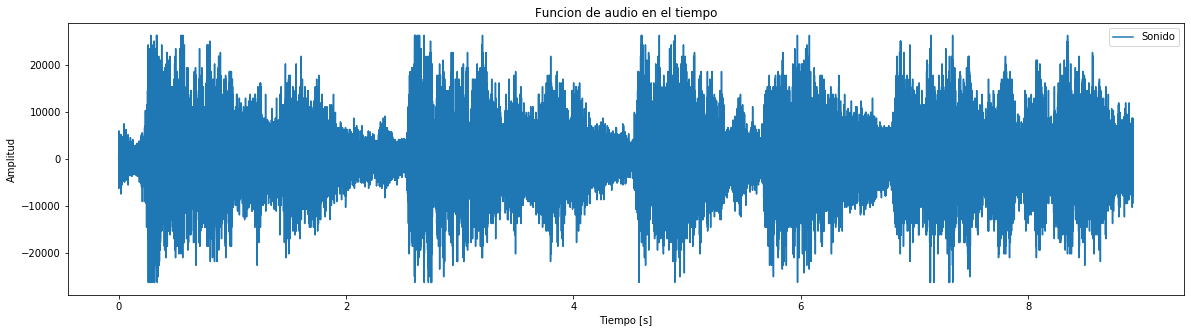

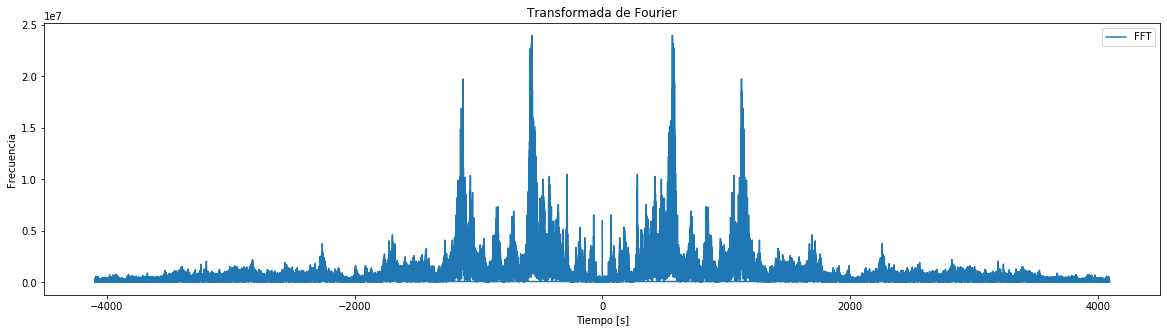

Muestreo :  8192
Frecuencias :  [ 0.          0.11204574  0.22409147 ... -0.33613721 -0.22409147
 -0.11204574]
N   :  8.9249267578125


In [124]:
#!python
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.fftpack as fft
import scipy.io.wavfile as waves

archivo = '/Users/monicaaraneda/Documents/CAPACITACION/USACH/2020-1/2.-REDES-COMPUTADORES/Laboratorio_1/lab/B/handel.wav'
muestreo, signal = waves.read(archivo)

size= signal.shape[0] / muestreo
print(f"duracion = {size}s")
time = np.linspace(0., size, signal.shape[0])
plt.figure(figsize=(20,5))
plt.plot(time, signal, label="Sonido")

plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Funcion de audio en el tiempo")
plt.show()

fft_x = fft.fft(fft.ifftshift(signal))
freqs = fft.fftfreq(len(fft_x)) * muestreo

plt.figure(figsize=(20,5))
plt.plot(freqs, np.abs(fft_x), label="FFT")
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia")
plt.title("Transformada de Fourier")
plt.show()


print("Muestreo : ", str(muestreo))
print("Frecuencias : ", str(freqs))
print("N   : ", str(size))


# Discrete Time Fourier Transform
The discrete Fourier transform of variable  𝑥  at frequency  𝑓  is
$\[
\sum_{i=1}^{3}x_{i} = X*k*e^{−𝑖2𝜋𝑓(𝑘−1)𝑛^{−1}
\]$
   
 

In [70]:
import numpy as np
from numpy import exp

pi = np.pi
time = np.arange(0, len(signal), 1)/len(signal)

#sample_rate, samples = wavfile.read('handel.wav')  #audio original
muestreo, signal = waves.read(archivo)



A continuación, generé una simulación que combina múltiples ondas sinusoidales que oscilan a diferentes frecuencias. Las tasas de muestreo más altas nos permiten observar mejor las señales subyacentes.  Esto dará como resultado una vista irregular de los datos, pero aún podemos observar con precisión la frecuencia.

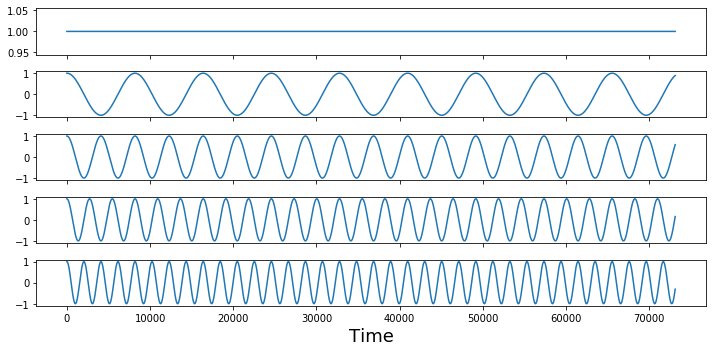

In [111]:
import numpy as np
sine_waves = []
exp = np.exp
pi = np.pi
for i in range(4000):
    sine_waves.append(exp(-1j*2*pi*i*time))
sine_waves = np.array(sine_waves)

f,a = plt.subplots(nrows=5, figsize=(10,5), sharex=True)
for i in range(0,5):
    a[i].plot(sine_waves[i,:])
plt.xlabel('Time', fontsize=18)
plt.tight_layout()



Text(0.5, 0, 'Time')

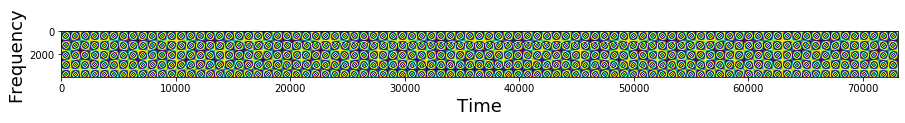

In [7]:
plt.figure(figsize = (15,15))
plt.imshow(np.real(sine_waves))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Time', fontsize=18)

# Producto Punto
Ahora tomaré el producto de punto de cada una de las ondas establecidas con la señal

In [65]:
# dot product
print(len(signal), len(sine_waves))
#print("signal", str(signal))
#print("sine_waves", str(sine_waves))
#print("len sine_waves ", str(len(sine_waves[0])))
#print("len signal ", str(len(signal[0])))
for n in range(len(sine_waves)):
   fourier = (np.dot(signal, sine_waves[n]))
print(fourier)

73113 4000
(-8733.390444202934-1127.0150640364213j)


(-8733.390444202934-1127.0150640364213j)


Text(0, 0.5, 'Amplitude')

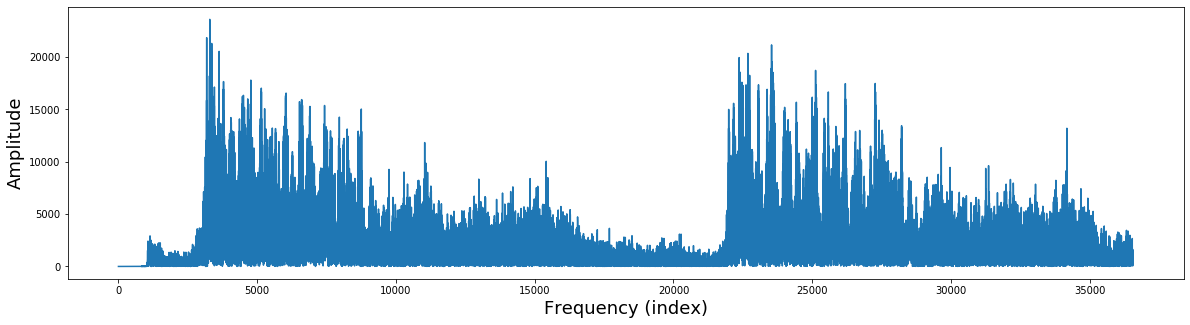

In [66]:
print(fourier)
plt.figure(figsize=(20,5))
plt.plot(np.abs(signal[0:int(np.ceil(len(signal)/2))]))
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

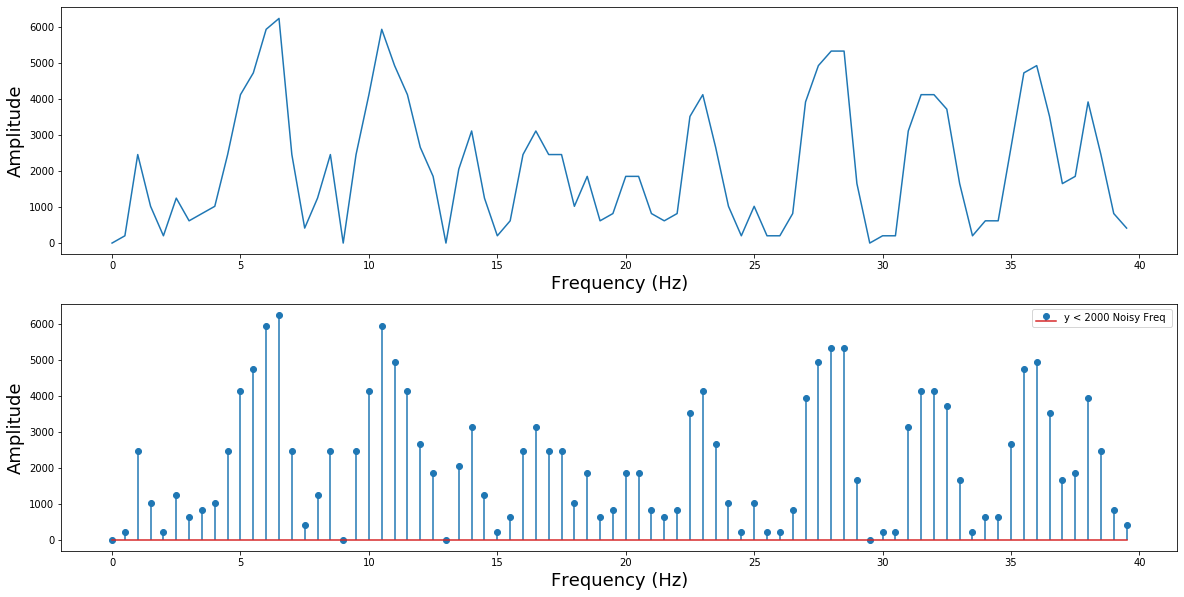

In [123]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(np.arange(0, 80)/2, np.abs(signal)[0:80])
#plt.plot(signal)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

#plt.stem(x, abs(X), use_line_collection=True)
x= np.arange(0, 80)/2
y= np.abs(signal)[0:80]
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')
plt.subplot(212) 
plt.stem(x, y, bottom=0, use_line_collection = True, label='y < 2000 Noisy Freq ') 
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.legend()

# Fast Fourier Transform 
La transformación de Fourier de tiempo discreto es útil para comprender la relación entre los dominios de tiempo y frecuencia. Sin embargo, en la práctica este método rara vez se usa, ya que existen métodos más rápidos y eficientes para realizar este cálculo. Un algoritmo popular se llama la transformación rápida de Fourier (FFT). Esta función también está en numpy np.fft.fft.

Frecuencias :  [ 0.          0.11204574  0.22409147 ... -0.33613721 -0.22409147
 -0.11204574] Nº : 73113


Text(0, 0.5, 'Frequency (Hz)')

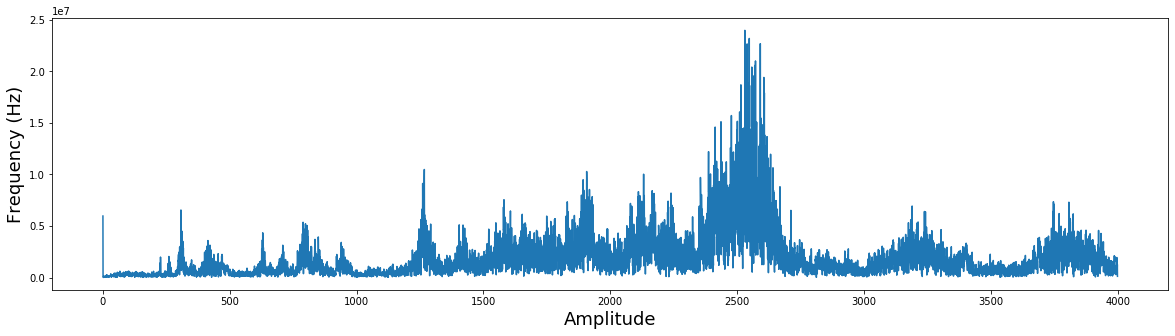

In [82]:
from numpy.fft import fft, ifft, ifftshift, fftfreq

fourier_fft = fft(signal)
freqs = fftfreq(len(fourier_fft)) * muestreo

print("Frecuencias : ", str(freqs), "Nº :", str(len(freqs)))

plt.figure(figsize=(20,5))
plt.plot((np.arange(0,8000)/2), np.abs(fourier_fft[0:8000]))  # la mitad positiva de la señal
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)

Hay 73113 frecuencias diferentes que tienen amplitudes variables.  

# Inverse Fourier Transform
También podemos usar el ifft para realizar una transformación inversa de Fourier

Text(0.5, 0, 'Time')

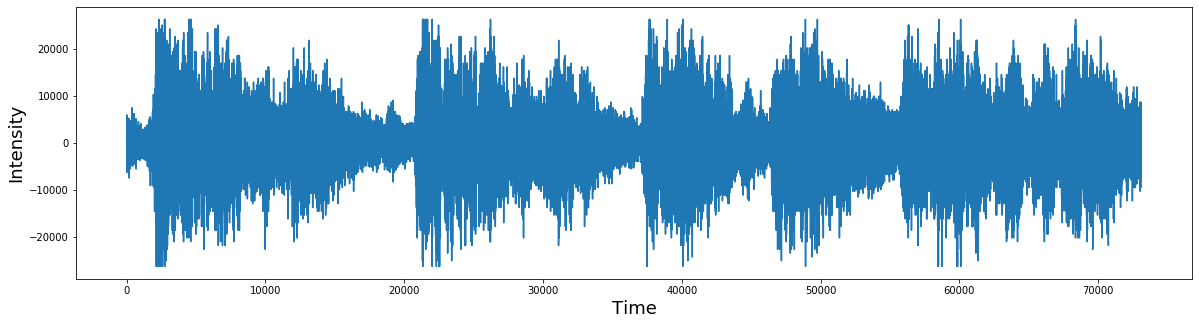

In [78]:
plt.figure(figsize=(20,5))
plt.plot(ifft(fourier_fft))
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

(-8733.390444202934-1127.0150640364213j)


Text(0.5, 0, 'Time')

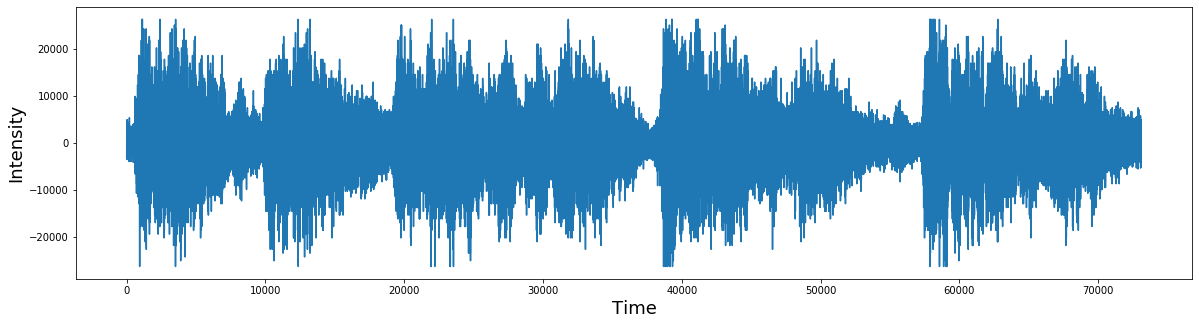

In [79]:
print(fourier)
ifourier = np.fft.ifftshift(ifft(fourier_fft))
plt.figure(figsize=(20,5))
plt.plot(ifourier)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

# Filter FIR
High Pass

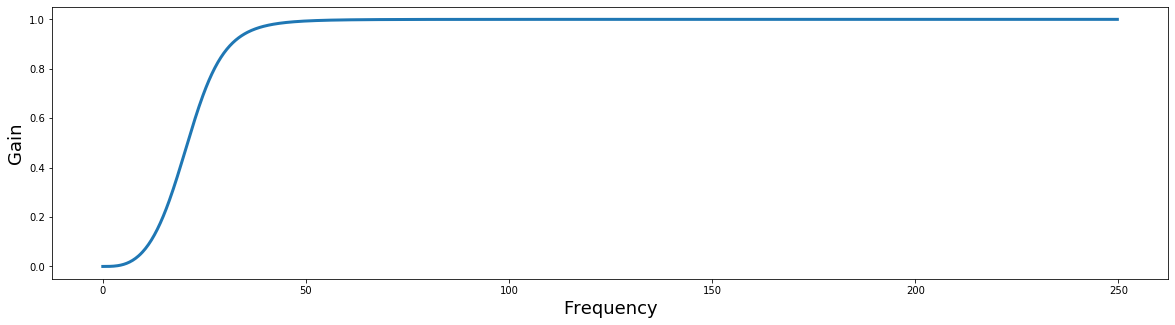

In [24]:
from scipy.signal import butter, filtfilt, freqz

filter_order = 3
frequency_cutoff = 25
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)
    
plot_filter(b, a, sampling_frequency)

# filter High
Observé cómo la ganancia se escala desde [0,1] Los filtros se pueden multiplicar por la FFT de una señal para aplicar el filtro en el dominio de la frecuencia. Cuando la señal resultante se transforma nuevamente en el dominio del tiempo usando la FFT inversa, la nueva señal se filtrará. Esto puede ser mucho más rápido que aplicar filtros en el dominio del tiempo.

El parámetro filter_order para ajustar la nitidez del corte en el dominio de frecuencia. Intenté usar  diferentes valores para ver cómo cambia la trama del filtro.

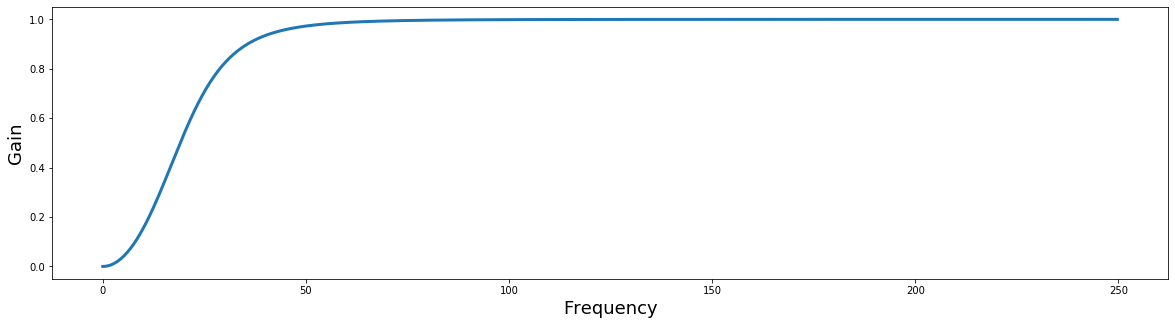

In [26]:
filter_order = 2
frequency_cutoff = 25
sampling_frequency = 500

b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)    

plot_filter(b, a, sampling_frequency)

Cómo se ve el filtro en el dominio temporal. Tomé la FFT inversa y la trace para ver cómo se ve como un núcleo en el dominio temporal. Observe cómo cambiar el orden del filtro agrega más ondas en el dominio del tiempo.

/Users/monicaaraneda/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time')

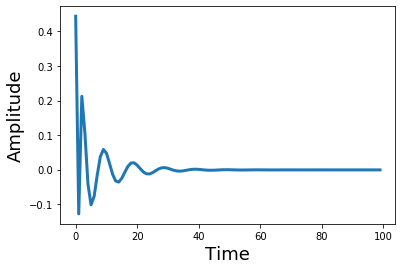

In [27]:
from scipy.signal import sosfreqz

filter_order = 8
sos = butter(filter_order, frequency_cutoff, btype='high', output='sos', fs=sampling_frequency)    
w_sos, h_sos = sosfreqz(sos)

plt.plot(ifft(h_sos)[0:100], linewidth=3)
plt.ylabel('Amplitude', fontsize=18)
plt.xlabel('Time', fontsize=18)

# Filter
Ahora apliqué el filtro a mis datos. Apliqué el filtro a la señal en el dominio del tiempo utilizando la función filtfilt. Esta es una buena opción predeterminada, aunque hay varias otras funciones para aplicar el filtro. filtfilt aplica el filtro hacia adelante y luego hacia atrás asegurando que haya una distorsión de fase cero.

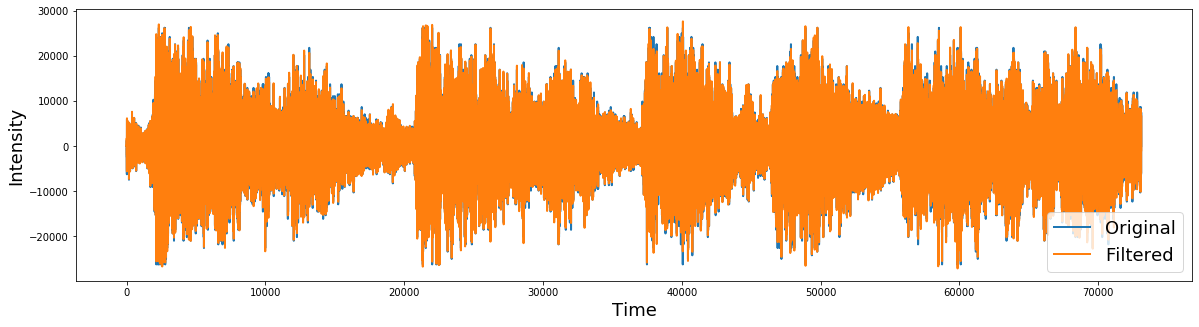

In [45]:
fourier_fft = fft(signal)
fourier_ifft = ifft(fourier_fft)

filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

# Low Pass
Los filtros Low Pass  solo retienen las señales de baja frecuencia, lo que elimina cualquier información de alta frecuencia.

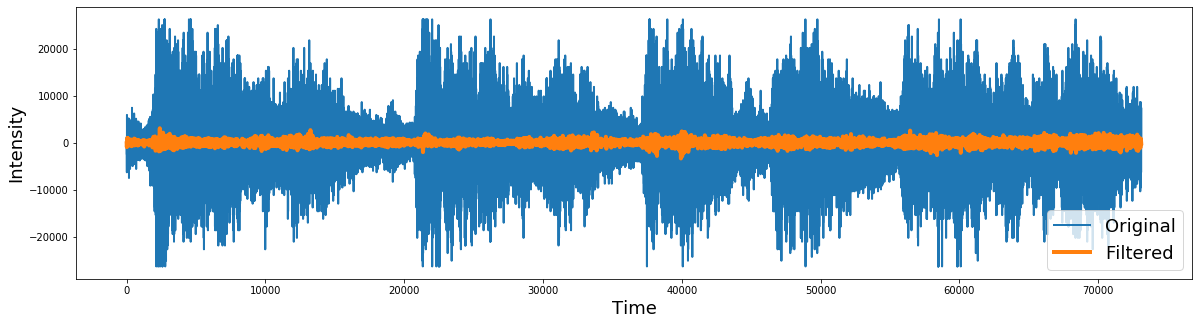

In [29]:
from scipy.signal import butter, filtfilt
filter_order = 2 
frequency_cutoff = 10
sampling_frequency = 500
# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)
# Apply the filter
filtered = filtfilt(b, a, signal)
plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

Como se ve el filtro

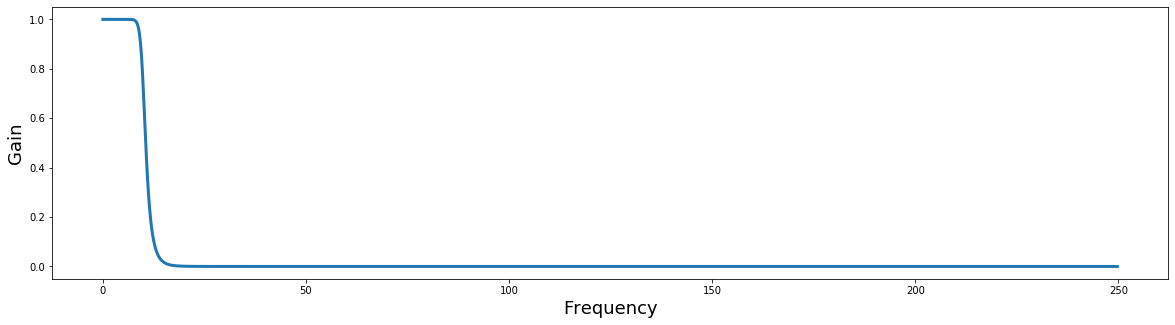

In [30]:
filter_order = 10
frequency_cutoff = 10
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

plot_filter(b, a, sampling_frequency)

# Bandpass
Los filtros de paso de banda permiten retener solo una frecuencia específica. 

Voy a  seleccionar y eliminar frecuencias específicas.

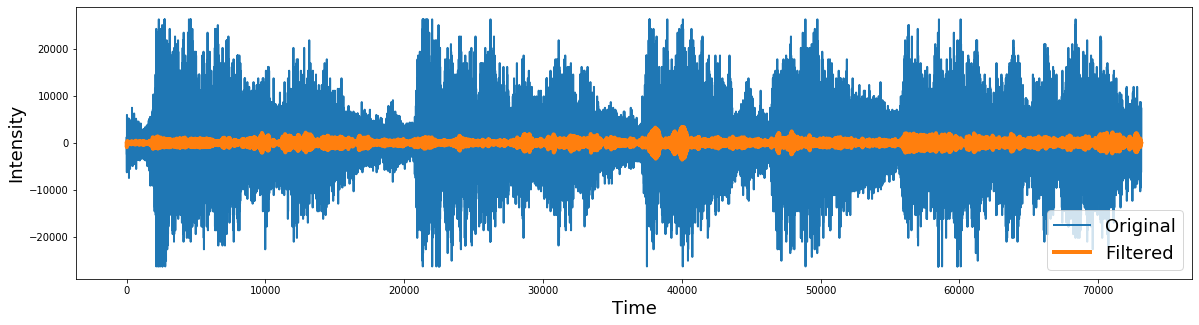

In [112]:
filter_order = 2 
lowcut = 7
highcut = 13

# Create the filter
b, a = butter(filter_order, [lowcut, highcut], btype='bandpass', output='ba', fs=sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

# Band-Stop
Los filtros Bandstop eliminan una frecuencia específica de la señal

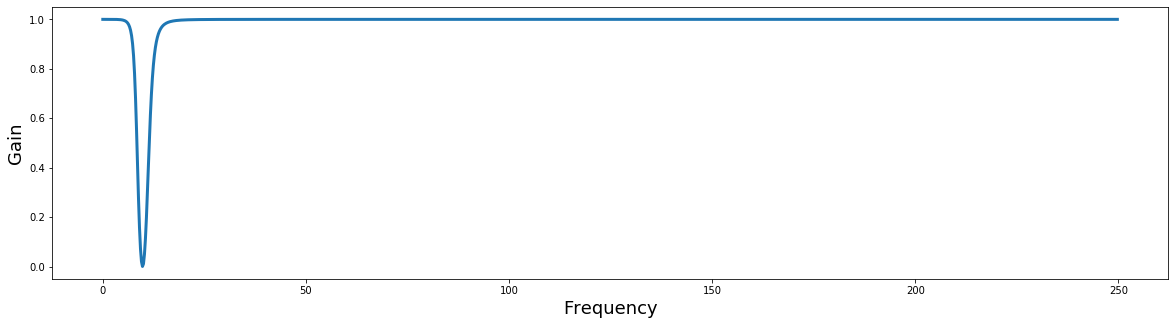

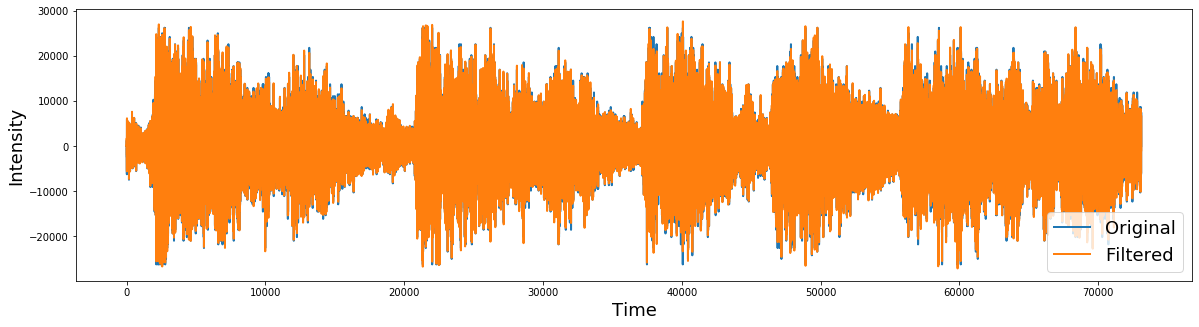

In [32]:
filter_order = 2 
lowcut = 8
highcut = 12
# Create the filter
b,a = butter(filter_order, [lowcut, highcut], btype='bandstop', output='ba', fs=sampling_frequency)
# Plot the filter
plot_filter(b, a, sampling_frequency)
# Apply the filter
filtered = filtfilt(b, a, signal)
plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

# Convolucion
La convolución en el dominio del tiempo es la misma multiplicación en el dominio de la frecuencia.

original_signal  [    0  -202 -2459 ...  7452  4930     0]
filtered_signal [   0.          -26.45228868 -350.8388505  ... 1679.42987893  645.59298603
    0.        ]


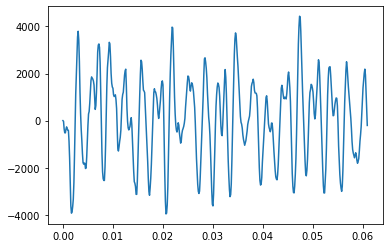

In [47]:
original_signal= signal
t = np.linspace(0., size, signal.shape[0])  # time
taps = np.array([
    0.130951924144877080,
    0.142713213023077851,
    0.150057552393435101,
    0.152554620877219965,
    0.150057552393435101,
    0.142713213023077851,
    0.130951924144877080,
])
filtered_signal = np.convolve(original_signal,taps)
plt.plot(t[:500],filtered_signal[:500])

print("original_signal ", str(original_signal))
print("filtered_signal", str(filtered_signal))

# Audio 
Original: handel y Filtrado : filtered.wav  Ruido incluido: audio_2.wav

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math
import contextlib

nombreOrigen = 'handel.wav'
nombreDestino = 'filtered.wav'

frecuenciaDeCorte = 400.0  #cutOffFrequency

# desde http://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def running_mean(x, windowSize):
  cumsum = np.cumsum(np.insert(x, 0, 0)) 
  return (cumsum[windowSize:] - cumsum[:-windowSize]) / windowSize

# desde http://stackoverflow.com/questions/2226853/interpreting-wav-data/2227174#2227174
def interpret_wav(raw_bytes, n_frames, n_channels, sample_width, interleaved = True):

    if sample_width == 1:
        dtype = np.uint8 # unsigned char
    elif sample_width == 2:
        dtype = np.int16 # signed 2-byte short
    else:
        raise ValueError("Solo admite formatos de audio de 8 y 16 bits..")

    channels = np.fromstring(raw_bytes, dtype=dtype)

    if interleaved:
        # los canales están intercalados, es decir, la muestra N del canal M sigue la muestra N del canal M-1 en datos sin procesar
        channels.shape = (n_frames, n_channels)
        channels = channels.T
    else:
        # Los canales no están intercalados. Todas las muestras del canal M ocurren antes de todas las muestras del canal M-1
        channels.shape = (n_channels, n_frames)

    return channels

with contextlib.closing(wave.open(nombreOrigen,'rb')) as spf:
    frecuenciaDeMuestreo = spf.getframerate()   
    anchoAmplificador = spf.getsampwidth()   
    nCanales = spf.getnchannels()    
    nMarcos = spf.getnframes()   

    # Extraer audio sin formato de archivo Wav multicanal
    senal = spf.readframes(nMarcos*nCanales)  # signal
    spf.close()
    canales = interpret_wav(senal, nMarcos, nCanales, anchoAmplificador, True)

    # obtener el tamaño de la ventana
    # desde http://dsp.stackexchange.com/questions/9966/what-is-the-cut-off-frequency-of-a-moving-average-filter
    frecuenciaRatio = (frecuenciaDeCorte/frecuenciaDeMuestreo)
    N = int(math.sqrt(0.196196 + frecuenciaRatio**2)/frecuenciaRatio)

    # Usar promedio móvil (solo en el primer canal)
    filtrada = running_mean(canales[0], N).astype(canales.dtype)

    archivo_wav = wave.open(nombreDestino, "w")
    archivo_wav.setparams((1, anchoAmplificador, frecuenciaDeMuestreo, nMarcos, spf.getcomptype(), spf.getcompname()))
    archivo_wav.writeframes(filtrada.tobytes('C'))
    archivo_wav.close()

/Users/monicaaraneda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


WAV file:  Fs = 8192, x.shape = (73113,), x.dtype = float32


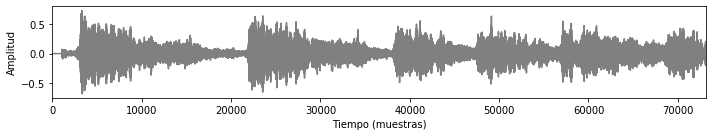

WAV file:  Fs = 8192, x.shape = (73105,), x.dtype = float32


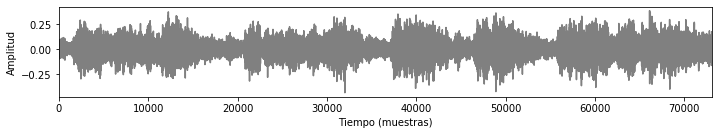

In [61]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
#%matplotlib inline

def print_plot_play(x, Fs, text=''):
    """1. Imprime informacion 
    Args: 
        x: señal de entrada
        Fs: tasa de muestre de x  handel
        text: texto a imprimir
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(10, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

# Read wav  ruta /lab/B
fn_wav = os.path.join('.', 'lab', 'B', 'audio_2.wav')
x1, Fs1 = librosa.load(fn_wav, sr=None)
print_plot_play(x=x1, Fs=Fs1, text='WAV file: ')

# Read wav  ruta /lab/B
fn_wav = os.path.join('.', 'lab', 'B', 'filtered.wav')
x2, Fs2 = librosa.load(fn_wav, sr=None)
print_plot_play(x=x2, Fs=Fs2, text='WAV file: ')

# Espectograma

/Users/monicaaraneda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


(array([    0,  -202, -2459, ...,  7452,  4930,     0], dtype=int16), 8192)

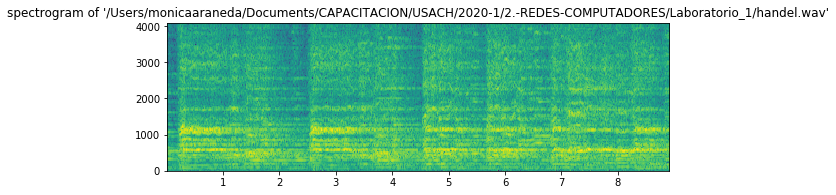

In [53]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(9, 6))
    pylab.subplot(211)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


graph_spectrogram(archivo)  #directo del audio
get_wav_info(archivo)

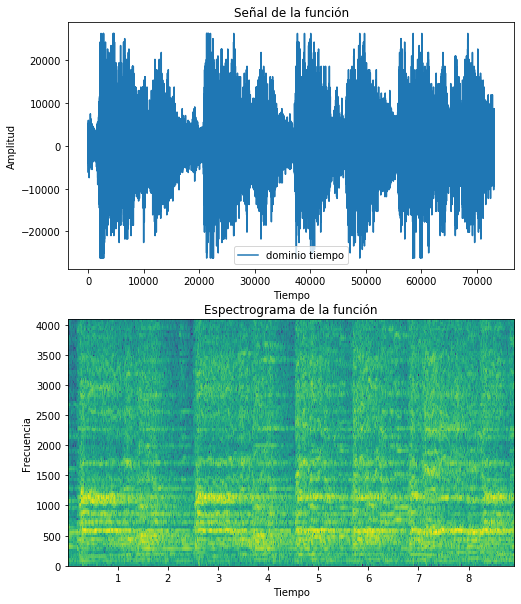

In [73]:
import matplotlib.pyplot as plot
Fs = Fs1
# Plot the signal
plot.figure(figsize=(8,10))
plot.subplot(211)
plot.plot(signal, label="dominio tiempo")
plot.xlabel('Tiempo')
plot.ylabel('Amplitud')
plot.legend()
plot.title('Señal de la función')

# Plot the spectrogram
plot.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(signal, Fs=Fs)
plot.xlabel('Tiempo')
plot.ylabel('Frecuencia')
plot.title('Espectrograma de la función')

plt.show()

In [119]:
from pylab import *
import scipy.signal as sg

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = sg.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    plt.figure(figsize=(10,10))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitud (db)')
    xlabel(r'Frecuencia Normalizada (x$\pi$rad/sample)')
    title(r'Respuesta Frecuencia')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Fase (radians)')
    xlabel(r'Frecuencia Normalizada (x$\pi$rad/sample)')
    title(r'Respuesta de Fase')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = sg.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitud')
    xlabel(r'n (muestreo)')
    title(r'Respuesta impulso')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitud')
    xlabel(r'n (muestreo)')
    title(r'Paso de Respuesta')
    subplots_adjust(hspace=0.5)

8192


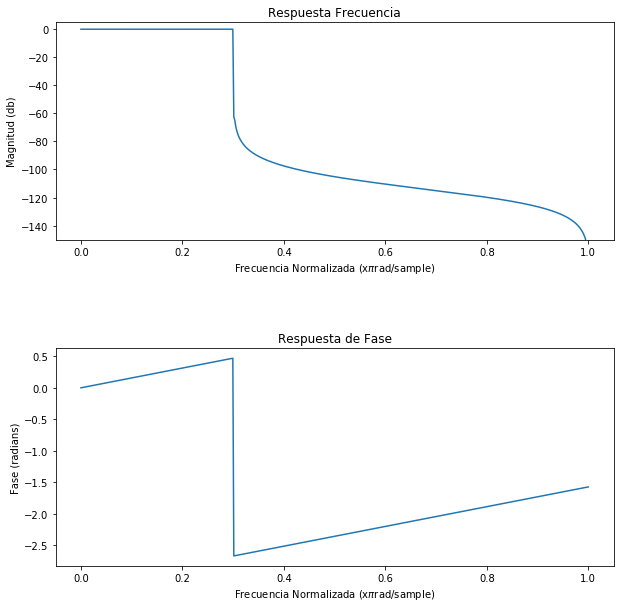

In [122]:
import scipy.signal as sg
#Lowpass FIR filter
print(muestreo)
n = muestreo
a = sg.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)